# The Chaos Game

The Chaos Game is an iterative game in which a picture is drawn one point at a time. In other words, after playing the game one obtains a drawing formed by a collection of points selected following some rules. Before playing, one must setup the game performing the following actions:

1. Choose three points in the plane that will represent the vertices of a triangle. Here, I chose three points that make an equilateral triangle. Nevertheless, this is not necesary, and one may choose any 3 points. 
2. Choose an additional point to be the seed for the iterative process. This point may be anywhere in the plane, inside or outside the triangle.

To play the game, take the following steps:

1. Randomly choose one of the triangle's vertices. For example, this can be done numbering the vertices 1-3 and using a three sided die to select one of them.
2. Mark the point that lies midway between the seed and the chosen vertex. In other words, take the line segment that joins seed and vertex and mark its middle point.
3. Consider the point marked in 2 as the new seed of the process and repeat intructions 1-3.

The rules are ilustrated here:

![rules_gif](Chaos_game_rules_10_iterations.gif)

If the process is repeated a number of times n, how does the picture look after the n iterations? Is it different each time we play the game? Is it possible that this seemingly random game converges to something specific after a large number of iterations ($n\rightarrow\infty$)? 

Let's play and see. 

![game_gif](Chaos_game_500_iterations.gif)

The game shown above consists of 500 iterations. The final picture after the 500 iterations looks like this:

![500_png](frame500.png)

What happens if we take more steps? After 5,000 iterations, the results look like the following figure, where the first point of the game is shown in red.

![5000_png](result_5000_iterations.png)

Let's play again taking 10,000 iterations:

![10000_png](result_10000_iterations.png)

Notice that regardless of where the first point lies, after a large number of iterations, The Chaos Game always draws the same picture: a fractal called Sierpinski's Triangle. It can be proven that if we perform a large number of iterations, we will obtain Sierpinski's Triangle everytime we play the game. To prove this, one can proof three smaller statements:

1. An iteration of The Chaos Game takes a point in Sierpinski's Triangle to another point in Sierpinski's Triangle.
2. An iteration performed on a point not on Sierpinski's Triangle halves the distance to the closest point on Sierpinski's Triangle. This implies that after iterating a few times, the seed point has evolved into a point indistinguishable from a point on the triangle.
3. Due to the randomness of the process, the game will eventually get arbitrarily close to every point on Sierpinski's Triangle. 

More information and the proofs of these statements can be found in [this excellent website](https://arun.chagantys.org/technical/2020/04/28/chaos-game.html), along with interactive simulations of different versions of The Chaos Game.

Here, I provide a simple code that will show you the results of the game after n iterations. Run the following cell adjusting the value of n and play the game as many times as you want!

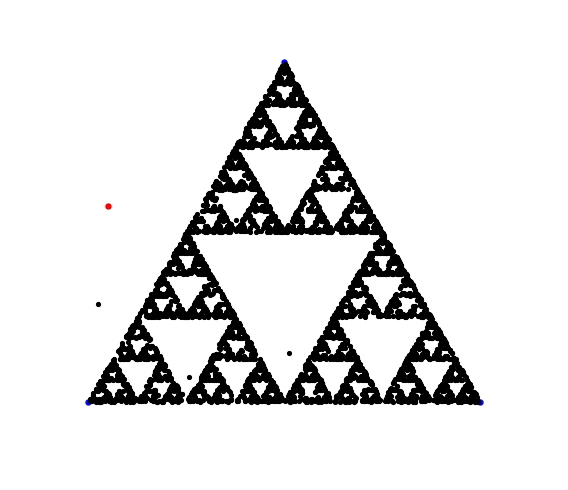

In [4]:
#import needed packages
import random as rd
import numpy as np
import matplotlib.pyplot as plt
#enter number of iterations
n=5000
#initial triangle vertices
V1=[1,1]
V2=[2,1]
V3=[1.5,1+np.sqrt(3)/2]
#seed (may fall inside or outside the triangle)
P=[rd.uniform(1,2),rd.uniform(1,1+np.sqrt(3)/2)]
x=[P[0]]
y=[P[1]]
#take the ieth step in the game
for i in range(1,n+1):
    choice=rd.random() #randomly choose a number between 0 and 1
    if choice<1/3: 
        #if choice is smaller than 1/3, then choose vertex 1
        s=V1 
        #determine the line that goes through the seed and vertex 1
        slope=(V1[1]-P[1])/(V1[0]-P[0]) 
        intercept=V1[1]-slope*V1[0]
    if choice>=1/3 and choice<2/3:
        #if choice is between 1/3 and 2/3, then choose vertex 2
        s=V2
        #determine the line that goes through the seed and vertex 2
        slope=(V2[1]-P[1])/(V2[0]-P[0])
        intercept=V2[1]-slope*V2[0]
    if choice>=2/3:
        #if choice is greater than 2/3, then choose vertex 3
        s=V3
        #determine the line that goes through the seed and vertex 3
        slope=(V3[1]-P[1])/(V3[0]-P[0])
        intercept=V3[1]-slope*V3[0]
    #find the point to be marked
    r=(s[0]+P[0])/2
    t=slope*r+intercept
    P=[r,t] #make this point the new seed
    #store the point in lists
    x.append(P[0])
    y.append(P[1])
#make the figure
fig,ax=plt.subplots(figsize=(6,5))
ax.scatter([V1[0],V2[0],V3[0]],[V1[1],V2[1],V3[1]], marker='.', s=50, color='blue')
ax.set_xlim([0.8,2.2])
ax.set_ylim([0.8,2])
ax.set_aspect('equal')
ax.set_axis_off()
plt.tight_layout()
ax.scatter(x,y,marker='.',color='black',s=30)
ax.scatter(x[0],y[0], marker='.', s=50, color='red')
plt.show()
fig.savefig(str(n)+'_iterations.png')